In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")
import glob, re, sys
import math
import uproot

In [9]:
datapath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/Data1A/training"
signalpath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/GluGluHToBB/"
VBFpath = "/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/VBFHToBB/"

datafileNames = glob.glob(datapath+"/*.parquet")
signalfileNames = glob.glob(signalpath+"**/*.parquet", recursive=True)
VBFfileNames = glob.glob(VBFpath+"*.parquet")

In [10]:
data = pd.read_parquet(datafileNames, columns=['dijet_pt','jet1_pt', 'jet2_pt', 'dijet_mass'])
signal = pd.read_parquet(signalfileNames, columns=['dijet_pt','jet1_pt', 'jet2_pt', 'dijet_mass'])
VBF = pd.read_parquet(VBFfileNames, columns=['dijet_pt','jet1_pt', 'jet2_pt', 'dijet_mass'])

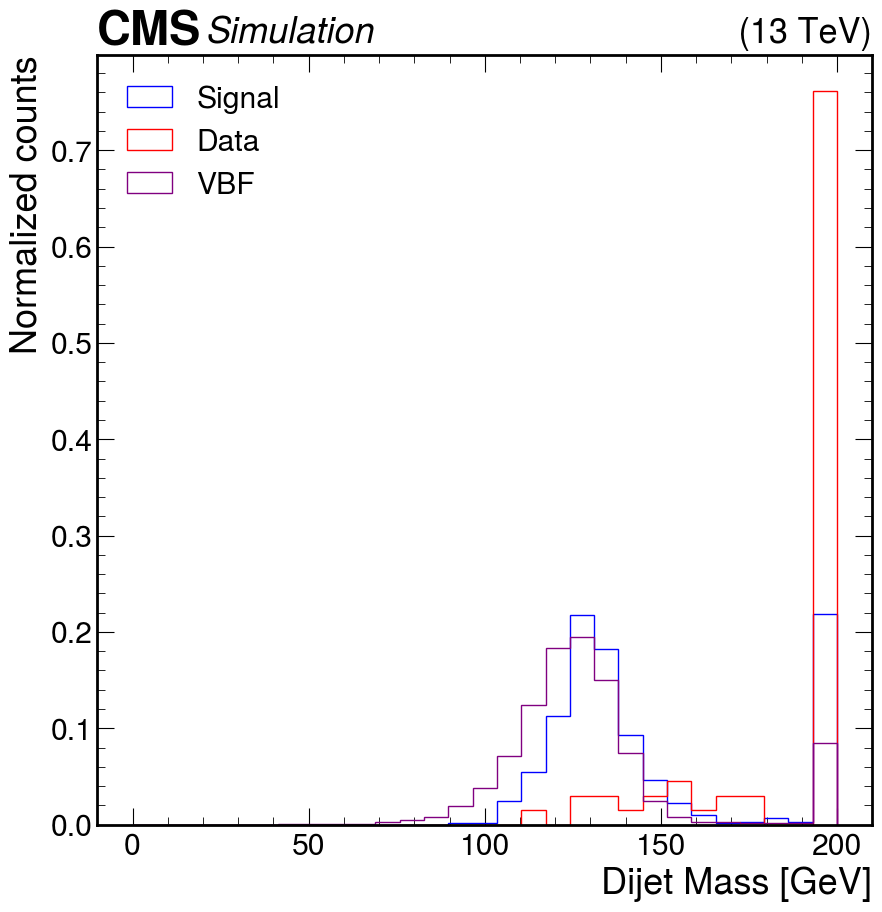

In [15]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(0, 200, 30)
cs = np.histogram(np.clip(signal.dijet_mass, bins[0], bins[-1]), bins=bins)[0]
cd = np.histogram(np.clip(data.dijet_mass, bins[0], bins[-1]), bins=bins)[0]
cvbf = np.histogram(np.clip(VBF.dijet_mass, bins[0], bins[-1]), bins=bins)[0]
cs=cs/np.sum(cs)
cd=cd/np.sum(cd)
cvbf=cvbf/np.sum(cvbf)
ax.hist(bins[:-1], bins=bins, weights=cs, histtype=u'step', label='ggF', color='blue')
ax.hist(bins[:-1], bins=bins, weights=cd, histtype=u'step', label='Data', color='red')
ax.hist(bins[:-1], bins=bins, weights=cvbf, histtype=u'step', label='VBF', color='purple')
ax.set_xlabel("Dijet Mass [GeV]")
ax.set_ylabel("Normalized counts")
hep.cms.label(ax=ax)
ax.legend()

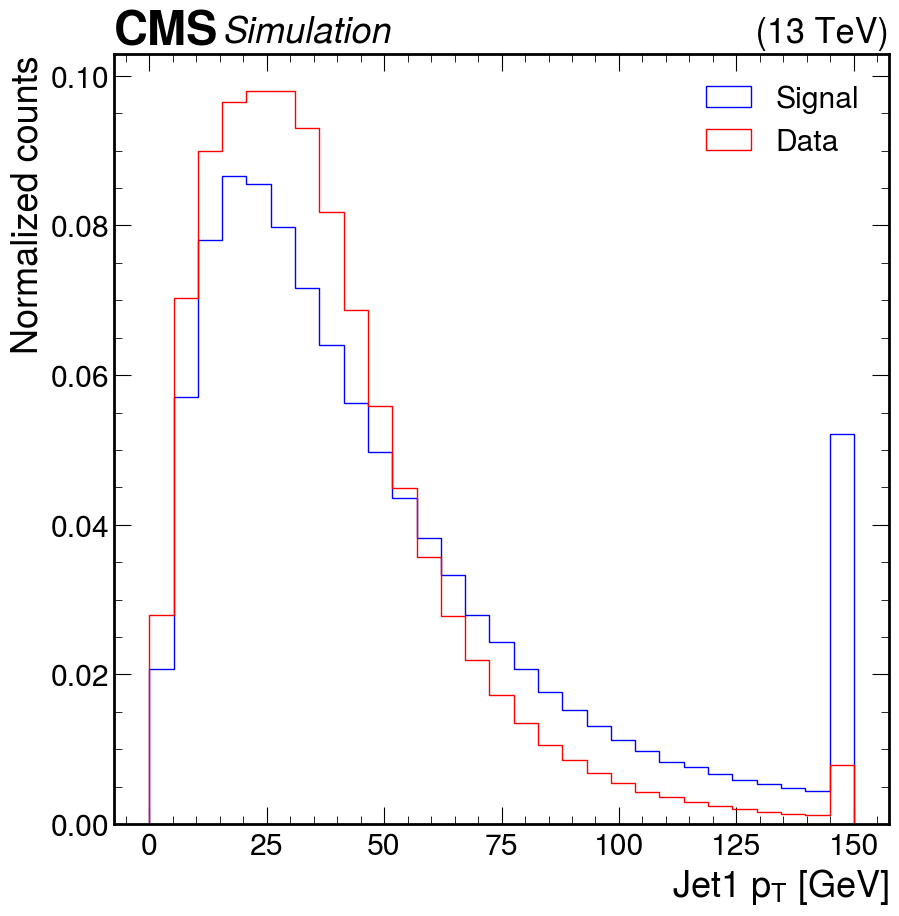

In [4]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(0, 150, 30)
cs = np.histogram(np.clip(signal.jet1_pt, bins[0], bins[-1]), bins=bins)[0]
cd = np.histogram(np.clip(data.jet1_pt, bins[0], bins[-1]), bins=bins)[0]
cs=cs/np.sum(cs)
cd=cd/np.sum(cd)
ax.hist(bins[:-1], bins=bins, weights=cs, histtype=u'step', label='Signal', color='blue')
ax.hist(bins[:-1], bins=bins, weights=cd, histtype=u'step', label='Data', color='red')
ax.set_xlabel(r"Jet1 p$_\text{T}$ [GeV]")
ax.set_ylabel("Normalized counts")
hep.cms.label(ax=ax)
ax.legend()

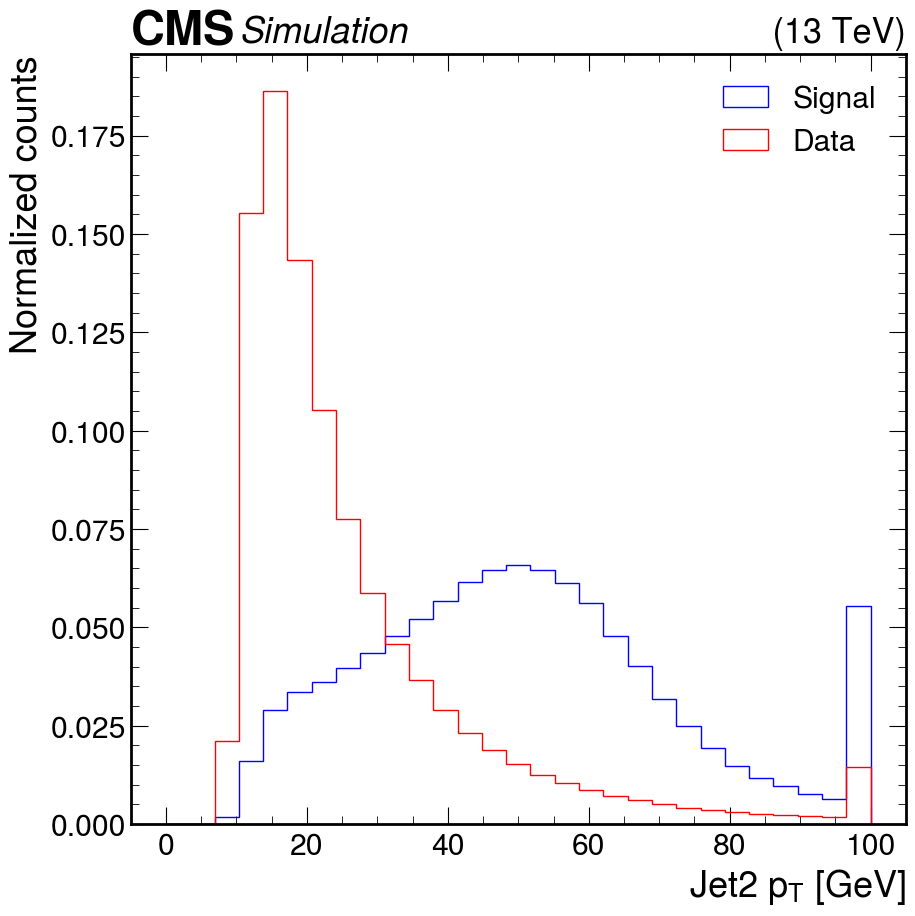

In [38]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(0, 100, 30)
cs = np.histogram(np.clip(signal.jet2_pt, bins[0], bins[-1]), bins=bins)[0]
cd = np.histogram(np.clip(data.jet2_pt, bins[0], bins[-1]), bins=bins)[0]
cs=cs/np.sum(cs)
cd=cd/np.sum(cd)
ax.hist(bins[:-1], bins=bins, weights=cs, histtype=u'step', label='Signal', color='blue')
ax.hist(bins[:-1], bins=bins, weights=cd, histtype=u'step', label='Data', color='red')
ax.set_xlabel(r"Jet2 p$_\text{T}$ [GeV]")
ax.set_ylabel("Normalized counts")
hep.cms.label(ax=ax)
ax.legend()


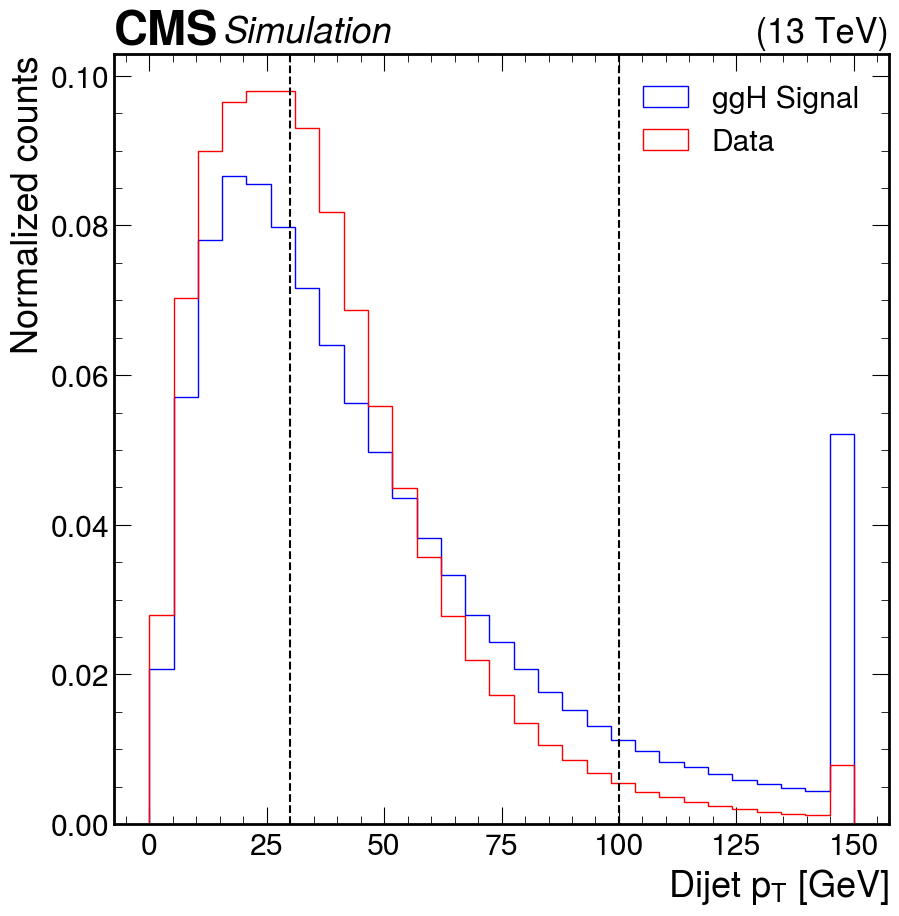

In [9]:
fig, ax = plt.subplots(1, 1)
bins=np.linspace(0, 150, 30)
cs = np.histogram(np.clip(signal.dijet_pt, bins[0], bins[-1]), bins=bins)[0]
cd = np.histogram(np.clip(data.dijet_pt, bins[0], bins[-1]), bins=bins)[0]
cs=cs/np.sum(cs)
cd=cd/np.sum(cd)
ax.hist(bins[:-1], bins=bins, weights=cs, histtype=u'step', label='ggH Signal', color='blue')
ax.hist(bins[:-1], bins=bins, weights=cd, histtype=u'step', label='Data', color='red')
ax.set_xlabel(r"Dijet p$_\text{T}$ [GeV]")
ax.set_ylabel("Normalized counts")
ax.set_ylim(ax.get_ylim())
ax.vlines(x=[30, 100], ymin=0, ymax=1, linestyle='dashed', color='black')
hep.cms.label(ax=ax)
ax.legend()

In [34]:
signalMask = (signal.jet1_pt>20) & (signal.jet2_pt>20)
dataMask = (data.jet1_pt>20) & (data.jet2_pt>20)

In [37]:
print("Signal eff. %.1f"%(np.sum(signalMask)/len(signal)*100))
print("Data eff. %.1f"%(np.sum(dataMask)/len(data)*100))

Signal eff. 91.5
Data eff. 48.0
